Start recording
start playing
Recorded sound for 50.18 seconds


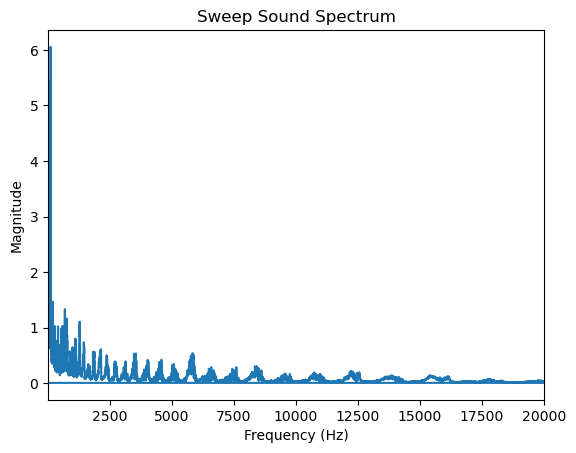

In [1]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
import time
import wave
import pyaudio
import threading

# Constants
CHANNELS = 1
SAMPLE_RATE = 44100
DURATION = 50  # Duration of the sweep sound in seconds
TOTAL_SAMPLES = int(SAMPLE_RATE * DURATION)
WINDOW_SIZE = 40000  # Updated window size
audio = None

def record_sound():
    global audio
    # Record audio from the microphone
    print("Start recording")
    start_time = time.time()
    audio = sd.rec(frames=TOTAL_SAMPLES, samplerate=SAMPLE_RATE, channels=CHANNELS, blocking=True)
    print("Recorded sound for {:.2f} seconds".format(time.time() - start_time))
    audio = audio.flatten()

def play_sound():
    global data
    stream = audio_player.open(format=audio_player.get_format_from_width(wav_file.getsampwidth()),
                          channels=wav_file.getnchannels(),
                          rate=wav_file.getframerate(),
                          output=True)
    print("start playing")
    stream.write(data)
    stream.stop_stream()
    stream.close()
    audio_player.terminate()
    wav_file.close()

wav_file = wave.open('sweep.wav', 'rb')
audio_player = pyaudio.PyAudio()
data = wav_file.readframes(wav_file.getnframes())

# Create and start the threads
play_thread = threading.Thread(target=play_sound)
record_thread = threading.Thread(target=record_sound)

record_thread.start()
play_thread.start()
# Wait for both threads to finish
record_thread.join()
play_thread.join()

# Create a Lanczos window
def lanczos_window(n):
    if n == 0:
        return 1.0
    elif n >= WINDOW_SIZE:
        return 0.0
    else:
        return np.sin(np.pi * n / WINDOW_SIZE) ** 2 / (np.pi * n / WINDOW_SIZE) ** 2

window = np.array([lanczos_window(n) for n in range(WINDOW_SIZE)])

# Apply the Lanczos window
num_chunks = len(audio) // WINDOW_SIZE
audio = audio[:num_chunks * WINDOW_SIZE].reshape((num_chunks, WINDOW_SIZE)) * window

# Compute the FFT and extract the magnitude spectrum
fft = np.abs(np.fft.fft(audio, axis=1))
freq_bins = np.fft.fftfreq(WINDOW_SIZE, 1 / SAMPLE_RATE)[:WINDOW_SIZE]  # Updated freq_bins
spectrum = np.mean(fft[:, :WINDOW_SIZE], axis=0)  # Updated spectrum

# Plot the spectrum
plt.plot(freq_bins, spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Sweep Sound Spectrum')
plt.xlim(20, 20000)  # Adjusted frequency range
plt.show()


In [2]:
def calculate_offset_dB(spectrum):

    # Find the maximum dB value
    max_dB = np.max(spectrum)

    # Calculate the offset dB values for each frequency
    offset_dB = max_dB - spectrum

    return offset_dB

In [3]:
offset_dB_values = calculate_offset_dB(spectrum)
print(offset_dB_values)
print(offset_dB_values.size)

[4.05492312 2.03293299 3.51646549 ... 3.32202851 3.51646549 2.03293299]
40000


In [6]:
#IMPORTANT!#
#adjust the normalization rate based on your own sound system.
offset_dB_values_normalize = offset_dB_values / 2.4

In [5]:
import os

with open('output.txt', 'w') as file:
    for i, value in enumerate(offset_dB_values_normalize[0:18142]):
        line = f"{freq_bins[i]} {value}; "
        file.write(line)

# Remove the trailing semicolon from the last line
with open('output.txt', 'rb+') as file:
    file.seek(-2, os.SEEK_END)
    file.truncate()

print("Conversion completed. The output has been saved in 'output.txt'.")

Conversion completed. The output has been saved in 'output.txt'.
